## Minneapolis City Info: Active_Rental_Licenses

### Import Libraries

In [1]:

import pandas as pd
from scipy.stats import chi2_contingency
import json

# Graphing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Geospatial data
import geopandas as gpd

# Data
### 1.0 Load Data
From OpenData.Minneapolismn.gov : https://opendata.minneapolismn.gov/datasets/baf5f14d67704668884275686e3db867_0/explore

In [2]:
file_path="data/Active_Rental_Licenses.csv"
data=pd.read_csv(file_path)
data.head()


,X,Y,apn,OBJECTID,licenseNumber,category,milestone,tier,status,issueDate,...,licensedUnits,ward,neighborhoodDesc,communityDesc,policePrecinct,shortTermRental,latitude,longitude,xWebMercator,yWebMercator
0,-93.307754,44.895922,2102824320092,1,LIC385097,CONV,License Re,Tier 1,Active,2019/11/07 10:03:49+00,...,1,13.0,Armatage,Southwest,5.0,No,44.89592,-93.30775,-1.038697e+07,5.605151e+06
1,-93.290564,45.046278,1211821240019,2,LIC375543,CONV,License Re,Tier 1,Active,2019/01/07 08:11:35+00,...,1,4.0,Lind - Bohanon,Camden,4.0,No,45.04628,-93.29056,-1.038506e+07,5.628810e+06
2,-93.276253,44.936412,0302824430056,3,LIC408633,CHOWNEXMPT,License Re,Tier 1,Active,2023/05/22 13:38:34+00,...,7,8.0,King Field,Southwest,5.0,No,44.93641,-93.27625,-1.038346e+07,5.611516e+06
3,-93.305824,44.980465,2102924330058,4,LIC392462,CHOWN,Active,Tier 1,Active,2020/12/23 16:57:30+00,...,1,5.0,Harrison,Near North,4.0,No,44.98047,-93.30582,-1.038676e+07,5.618447e+06
4,-93.288422,45.003012,1602924110043,5,LIC390040,CONV,License Re,Tier 1,Active,2020/06/25 15:19:01+00,...,1,5.0,Hawthorne,Near North,4.0,No,45.00301,-93.28842,-1.038482e+07,5.621996e+06


### 1.1 Data Exploration and Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22807 entries, 0 to 22806
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  22807 non-null  float64
 1   Y                  22807 non-null  float64
 2   apn                22806 non-null  object 
 3   OBJECTID           22807 non-null  int64  
 4   licenseNumber      22807 non-null  object 
 5   category           22807 non-null  object 
 6   milestone          22807 non-null  object 
 7   tier               22597 non-null  object 
 8   status             22807 non-null  object 
 9   issueDate          22807 non-null  object 
 10  expirationDate     22807 non-null  object 
 11  address            22807 non-null  object 
 12  ownerName          22606 non-null  object 
 13  ownerAddress1      22588 non-null  object 
 14  ownerAddress2      1151 non-null   object 
 15  ownerCity          22588 non-null  object 
 16  ownerState         225

In [4]:
# Group columns by data type
grouped = data.columns.to_series().groupby(data.dtypes).groups

for dtype, columns in grouped.items():
    print(f"Columns with data type {dtype}: {', '.join(columns)}")

Columns with data type int64: OBJECTID, licensedUnits
Columns with data type float64: X, Y, ward, policePrecinct, latitude, longitude, xWebMercator, yWebMercator
Columns with data type object: apn, licenseNumber, category, milestone, tier, status, issueDate, expirationDate, address, ownerName, ownerAddress1, ownerAddress2, ownerCity, ownerState, ownerZip, ownerPhone, ownerEmail, applicantName, applicantAddress1, applicantAddress2, applicantCity, applicantState, applicantZip, applicantPhone, applicantEmail, neighborhoodDesc, communityDesc, shortTermRental


In [5]:
# Remove the secondary identifcation information
unnecessary_cols = ['applicantName', 'applicantAddress1', 'applicantAddress1', 'applicantAddress2','ownerAddress2', 'applicantCity',
            'ownerState', 'applicantState', 'ownerZip', 'applicantZip',  'ownerPhone', 'ownerEmail',
            'applicantPhone', 'applicantEmail' ]
df = data.drop(columns=unnecessary_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22807 entries, 0 to 22806
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 22807 non-null  float64
 1   Y                 22807 non-null  float64
 2   apn               22806 non-null  object 
 3   OBJECTID          22807 non-null  int64  
 4   licenseNumber     22807 non-null  object 
 5   category          22807 non-null  object 
 6   milestone         22807 non-null  object 
 7   tier              22597 non-null  object 
 8   status            22807 non-null  object 
 9   issueDate         22807 non-null  object 
 10  expirationDate    22807 non-null  object 
 11  address           22807 non-null  object 
 12  ownerName         22606 non-null  object 
 13  ownerAddress1     22588 non-null  object 
 14  ownerCity         22588 non-null  object 
 15  licensedUnits     22807 non-null  int64  
 16  ward              22551 non-null  float6

In [6]:
# Group columns by data type
grouped = df.columns.to_series().groupby(df.dtypes).groups

for dtype, columns in grouped.items():
    print(f"Columns with data type {dtype}: {', '.join(columns)}")

Columns with data type int64: OBJECTID, licensedUnits
Columns with data type float64: X, Y, ward, policePrecinct, latitude, longitude, xWebMercator, yWebMercator
Columns with data type object: apn, licenseNumber, category, milestone, tier, status, issueDate, expirationDate, address, ownerName, ownerAddress1, ownerCity, neighborhoodDesc, communityDesc, shortTermRental


In [7]:
df.ownerName.value_counts()

ownerName
FYR SFR Borrower, LLC           109
My C Truong                      78
WEST BANK COMMUNITY DEV CORP     75
Andrew Levin                     60
JEFFREY  KERSHNER                47
                               ... 
JAMES J JEDDELOH                  1
Richard A Kunath                  1
KEVIN  MCCLELLAN                  1
Diane M Spicer                    1
Michael Hankner                   1
Name: count, Length: 16218, dtype: int64

In [8]:
cat_wards = df.groupby('status')['category'].value_counts()
cat_wards

status      category  
Active      CHOWNEXMPT    9610
            CHOWN         6392
            CONV          4285
            CONVEXEMPT    1668
            ShrtTrmLic     591
            ShrtTrmReg     257
In Process  ShrtTrmReg       2
            CHOWN            1
            CHOWNEXMPT       1
Name: count, dtype: int64

1.1 Insights: 
1. almost 23,000 records
2. pretty filled data with no nulls except for secondary identification information (ownerAddress2, ownerPhone, ownerEmal)
3. FYR SFR Borrower, LLC has the most licenses with 109
4. Most of the business licenses are active  and the most popular category is CHONEXMPT

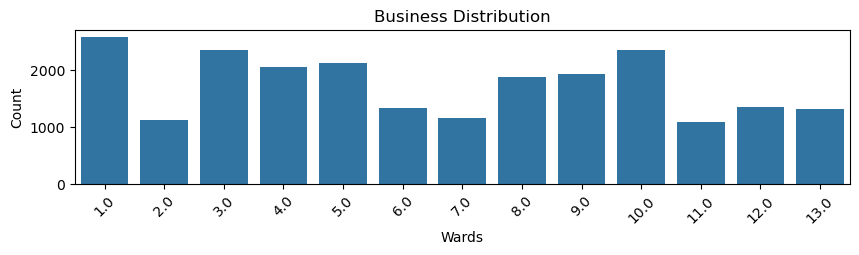

In [10]:
plt.figure(figsize=(10, 2))
sns.countplot(data=df, x='ward')
plt.xlabel('Wards')
plt.ylabel('Count')
plt.title('Business Distribution')
plt.xticks(rotation=45)
plt.show()

In [11]:
top_wards = df['ward'].value_counts().head(5)
print('Top Wards by Business Count:')
print(top_wards)

Top Wards by Business Count:
ward
1.0     2568
3.0     2342
10.0    2341
5.0     2111
4.0     2052
Name: count, dtype: int64


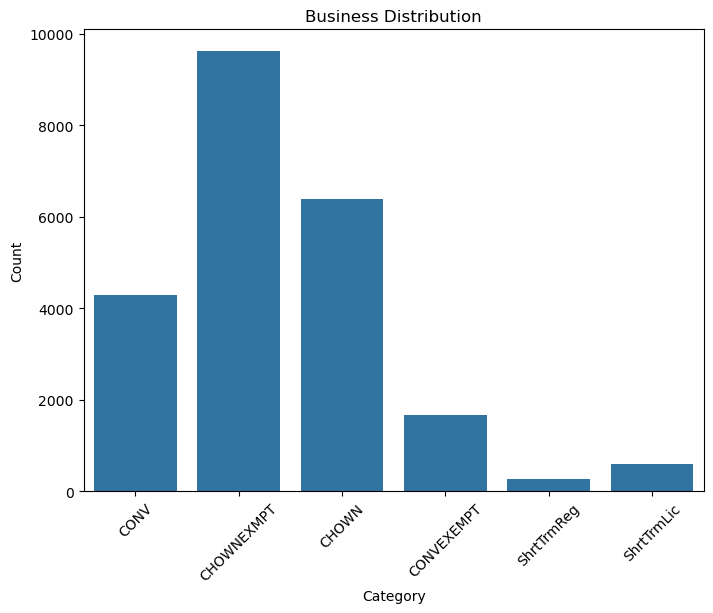

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Business Distribution')
plt.xticks(rotation=45)
plt.show()

## 1.2 GeoSpatial Data

In [27]:
mpls_zip = "data/City_Council_Wards-shp.zip" 
mpls_df = gpd.read_file(mpls_zip)

In [28]:
mpls_df.columns

Index(['FID', 'BDNUM', 'Shape_STAr', 'Shape_STLe', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

In [32]:
mpls_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         13 non-null     int64   
 1   BDNUM       13 non-null     object  
 2   Shape_STAr  13 non-null     float64 
 3   Shape_STLe  13 non-null     float64 
 4   SHAPE_Leng  13 non-null     float64 
 5   SHAPE_Area  13 non-null     float64 
 6   geometry    13 non-null     geometry
dtypes: float64(4), geometry(1), int64(1), object(1)
memory usage: 856.0+ bytes


In [29]:
print(mpls_df.geometry)

0     POLYGON ((-93.22685 45.01322, -93.22684 45.013...
1     POLYGON ((-93.24318 44.95583, -93.24304 44.955...
2     POLYGON ((-93.26313 45.01317, -93.26312 45.011...
3     POLYGON ((-93.29920 45.05114, -93.29920 45.051...
4     POLYGON ((-93.27478 44.94835, -93.27477 44.946...
5     POLYGON ((-93.28794 44.96324, -93.28800 44.962...
6     POLYGON ((-93.23650 44.99150, -93.23204 44.991...
7     POLYGON ((-93.28928 45.01303, -93.28802 45.013...
8     POLYGON ((-93.27571 44.97860, -93.27482 44.977...
9     POLYGON ((-93.24731 44.92513, -93.24731 44.923...
10    POLYGON ((-93.19989 44.94158, -93.19987 44.941...
11    POLYGON ((-93.31649 44.94891, -93.30769 44.934...
12    POLYGON ((-93.24565 44.96999, -93.24565 44.969...
Name: geometry, dtype: geometry


<Axes: >

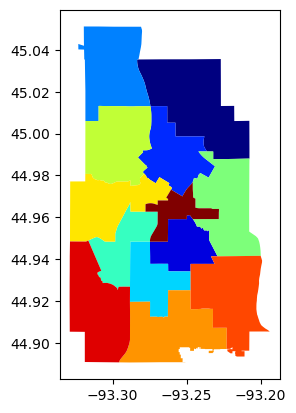

In [30]:
mpls_df.plot(cmap='jet')

In [60]:
conv_df = df[df['category']=='CONV']
conv_df.head()

,X,Y,apn,OBJECTID,licenseNumber,category,milestone,tier,status,issueDate,...,licensedUnits,ward,neighborhoodDesc,communityDesc,policePrecinct,shortTermRental,latitude,longitude,xWebMercator,yWebMercator
0,-93.307754,44.895922,2102824320092,1,LIC385097,CONV,License Re,Tier 1,Active,2019/11/07 10:03:49+00,...,1,13.0,Armatage,Southwest,5.0,No,44.89592,-93.30775,-1.038697e+07,5.605151e+06
1,-93.290564,45.046278,1211821240019,2,LIC375543,CONV,License Re,Tier 1,Active,2019/01/07 08:11:35+00,...,1,4.0,Lind - Bohanon,Camden,4.0,No,45.04628,-93.29056,-1.038506e+07,5.628810e+06
4,-93.288422,45.003012,1602924110043,5,LIC390040,CONV,License Re,Tier 1,Active,2020/06/25 15:19:01+00,...,1,5.0,Hawthorne,Near North,4.0,No,45.00301,-93.28842,-1.038482e+07,5.621996e+06
5,-93.217993,44.987424,1902923240006,6,LIC390318,CONV,License Re,Tier 1,Active,2020/07/27 09:11:06+00,...,1,2.0,Como,University,2.0,No,44.98742,-93.21799,-1.037698e+07,5.619542e+06
7,-93.281577,44.908155,1502824340041,8,LIC406459,CONV,License Re,Tier 1,Active,2023/01/25 14:42:39+00,...,1,11.0,Tangletown,Southwest,5.0,No,44.90815,-93.28158,-1.038406e+07,5.607074e+06


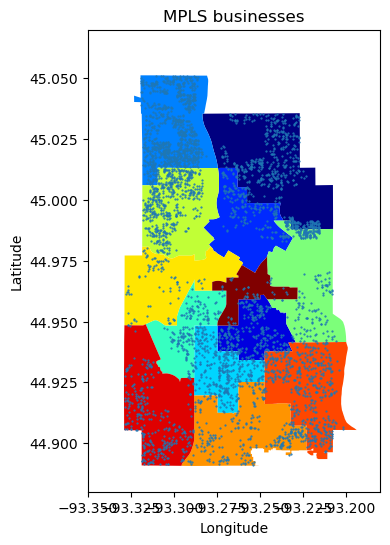

In [61]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
mpls_df.plot(cmap='jet', ax=ax)

# Plotting our Impact Energy data with a color map
x = df[df['category']=='CONV']['longitude']
y = df[df['category']=='CONV']['latitude']
a = df[df['category']=='CONV']['ward']
#z = df['licensedUnits']
plt.scatter(x, y, s=0.3,label=z)
#plt.colorbar(label='Units')

# Creating axis limits and title
plt.xlim([-93.35, -93.18])
plt.ylim([44.88, 45.07])


plt.title("MPLS businesses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [63]:
def plot_mpls(data, description="MPLS businesses"):
    """ Plotting data on the MPLS city map
    Arguments: 
        data (DataFrame): with longitude, latitude and ward columns"""
    
    # Creating axes and plotting Minneapolis map
    fig, ax = plt.subplots(figsize=(12, 6))
    mpls_df.plot(cmap='jet', ax=ax)

    # Plotting our data on the map
    x = data['longitude']
    y = data['latitude']
    a = data['ward']
    #z = df['licensedUnits']
    plt.scatter(x, y, s=0.3,label=z)
    #plt.colorbar(label='Units')

    # Creating axis limits and title
    plt.xlim([-93.35, -93.18])
    plt.ylim([44.88, 45.07])


    plt.title(description)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

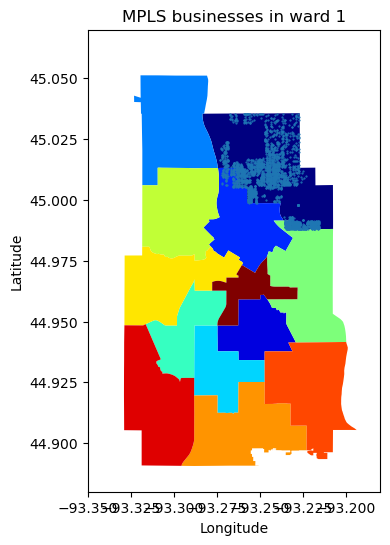

In [64]:
plot_mpls(df[df['ward']==1], 'MPLS businesses in ward 1')

In [ ]:


shape_file = gpd.read_file("data/Active_Rental_Licenses.shp")
ax = shape_file.plot(column='col1', figsize][12,8], edgecolor='block')
for x, y, label in 

shape_file2 = gpd.read_file("")
shape_file2 = shape_file(shape_file['col1'] == 'value')]

max_area = shape_file['col1'].max()
shape_file2 = shpae_file2[shape_file2['col']!=max_are)

# Join 2 geoDataFrames

shape_file2['col2'] = shape_file2.geometry
shape_file['colA'] = shape_file.geometry

shape_file2.crs = shape_file.crs

join = gpd.sjoin(shape_file2, shape_file[['col1','col2','col3']]